1. Importing LIBRARIES

In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
%matplotlib inline

import os

print("The REQUIRED LIBRARIES are SUCCESSFULLY IMPORTED")

The REQUIRED LIBRARIES are SUCCESSFULLY IMPORTED


2. Importing the FILE

In [8]:
filepath = r"C:\Users\Murali Krishna\Downloads\diabetes2.csv"
data = pd.read_csv(filepath)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


3. Some Info. regarding DATA

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.shape

(768, 9)

4. Power Transform

In [13]:
X = data.drop('Outcome', axis =1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
pt = PowerTransformer(method = 'yeo-johnson')
std_scaler = StandardScaler()
X_train = pd.DataFrame(data =std_scaler.fit_transform(pt.fit_transform(X_train)),columns = X_train.columns)

In [15]:
df_pt= pd.merge(X_train,y_train,right_index= True,left_index= True)
df_pt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,0.032235,0.023316,0.042402,0.004865,0.024881,0.042889,-0.001362,0.023240,0.345946
std,0.972703,1.018311,0.964754,0.998854,0.999450,0.987623,0.998220,0.992605,0.476320
min,-1.606051,-3.660528,-2.943367,-1.453285,-1.010891,-3.718453,-2.027889,-1.468399,0.000000
25%,-0.818641,-0.648671,-0.475547,-1.453285,-1.010891,-0.630958,-0.736311,-0.838257,0.000000
50%,0.064067,-0.092035,0.045275,0.354122,0.564010,-0.010851,-0.085556,-0.087096,0.000000
75%,0.854084,0.622345,0.604491,0.768418,0.976974,0.624032,0.803115,0.942827,1.000000
max,2.162908,2.436209,4.121913,1.896903,1.623107,4.968874,2.347963,2.105762,1.000000


In [16]:
X_test= pd.DataFrame(data =std_scaler.transform(pt.transform(X_test)),columns = X_test.columns)
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,0.090225,0.004071,-0.069662,-0.009731,-0.011515,0.015391,0.051434,0.047918
std,1.050848,0.967368,1.139338,1.064917,1.000521,1.082291,1.000630,1.001702
min,-1.606051,-1.845207,-2.943367,-1.453285,-1.010891,-3.718453,-1.987898,-1.468399
25%,-0.818641,-0.725788,-0.599572,-1.453285,-1.010891,-0.497787,-0.733139,-0.838257
50%,0.064067,-0.184968,0.045275,0.403324,0.221730,0.075649,-0.057580,-0.087096
75%,1.053607,0.746903,0.461167,0.811045,0.965161,0.627426,0.938874,0.942827
max,1.939237,2.373411,3.380358,2.920451,1.590476,3.520738,2.056853,1.865476


In [17]:
df = df_pt
df.skew()

Pregnancies                -0.153470
Glucose                    -0.103154
BloodPressure              -0.227618
SkinThickness              -0.507505
Insulin                    -0.010009
BMI                         0.358510
DiabetesPedigreeFunction    0.180025
Age                         0.126010
Outcome                     0.650367
dtype: float64

5. LOGISTIC REGRESSION

In [19]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
lr_predict = lrmodel.predict(X_test)

print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



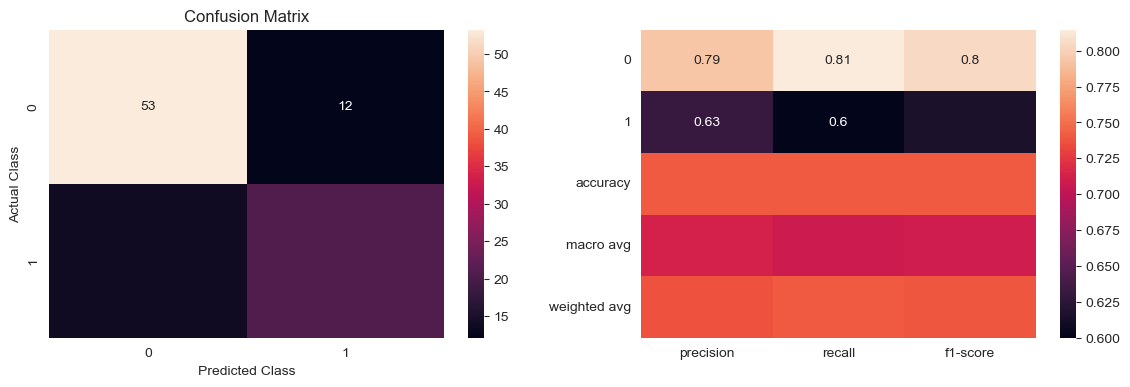

In [21]:
con_mat = confusion_matrix(y_test,lr_predict)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,lr_predict,output_dict=True)).T.iloc[:,:-1], annot = True)

plt.show()

6. K NEAREST NEIGHBOUR (KNN)

In [24]:
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(X_train,y_train)
pred_knn= knn.predict(X_test)

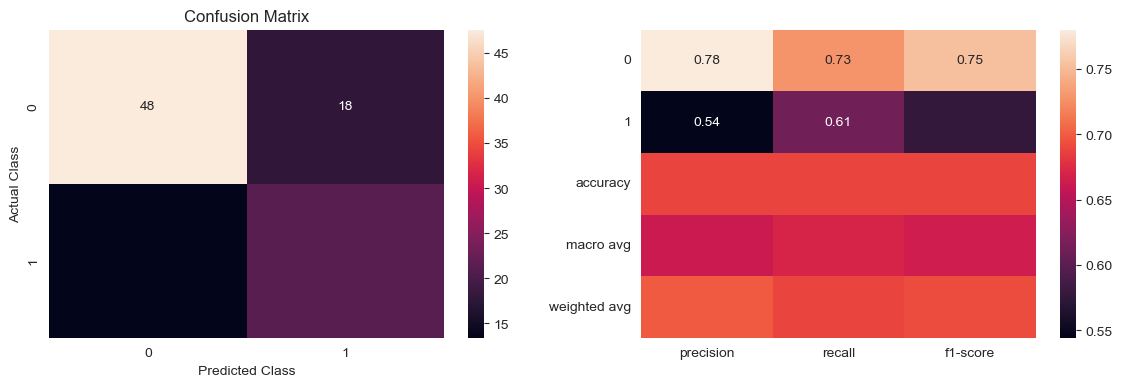

In [25]:
con_mat = confusion_matrix(y_test,pred_knn)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,pred_knn,output_dict=True)).T.iloc[:,:-1], annot = True)

plt.show()

7. SUPPORT VECTOR MACHINE (SVM)

In [27]:
model = SVC()
model.fit(X_train, y_train)
svm_prediction = model.predict(X_test)

print(classification_report(y_test,svm_prediction))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



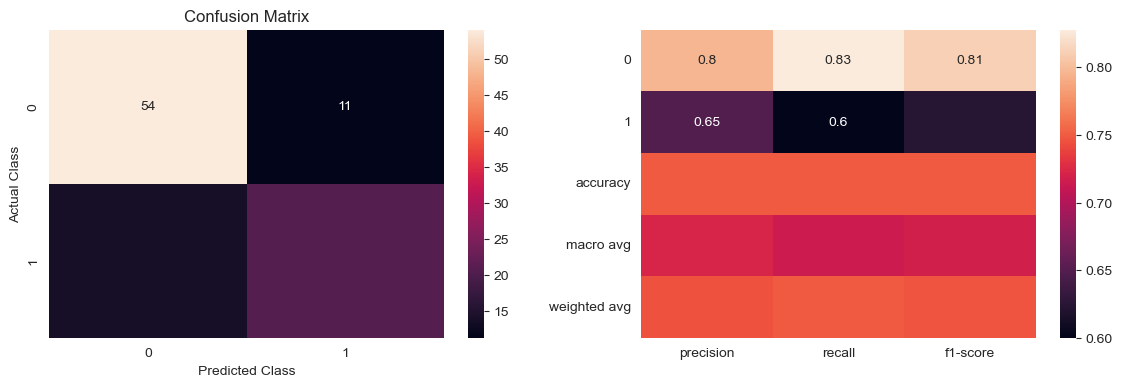

In [28]:
con_mat = confusion_matrix(y_test,svm_prediction)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,svm_prediction,output_dict=True)).T.iloc[:,:-1], annot = True)

plt.show()

8. DECISION TREES

In [29]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)

print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       151
           1       0.52      0.60      0.56        80

    accuracy                           0.67       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.67      0.68       231



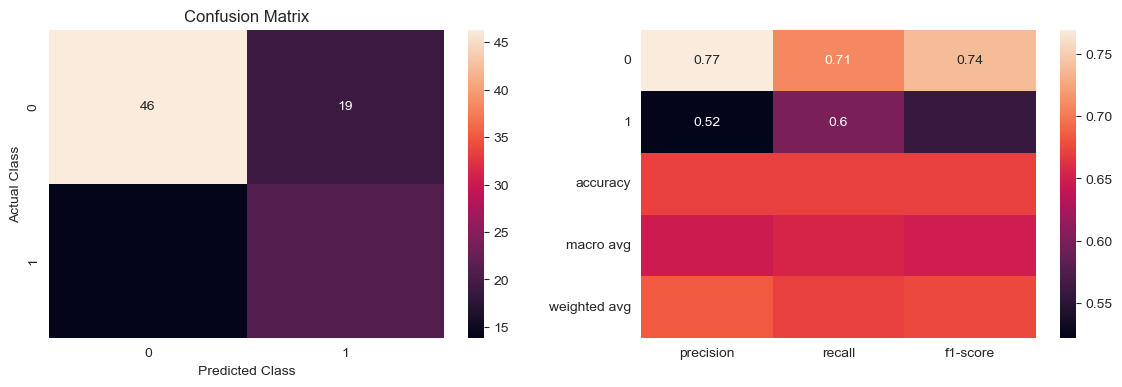

In [30]:
con_mat = confusion_matrix(y_test,pred_dt)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,pred_dt,output_dict=True)).T.iloc[:,:-1], annot = True)

plt.show()